In [ ]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import pandas as pd

from models.tft import (create_model, evaluate_model, get_train_val_datasets,
                        get_train_val_dfs, get_train_val_loaders, train_model)
from utils.preprocess import encode_categoricals

In [2]:
df = pd.read_csv('../data/consumption/dataset.csv')

df['USAGE_AT'] = pd.to_datetime(df['USAGE_AT'])
df['diff'] = df['USAGE_AT'].diff()

# Exclude the first row (where .diff() is NaT)
df_valid = df[df['diff'].notna()]

# Now check if all differences are exactly 1 hour
all_hourly = (df_valid['diff'] == pd.Timedelta(hours=1)).all()
df = df.drop(columns='diff')
print(all_hourly)

True


In [3]:
# Preprocess the DataFrame
df_preprocessed = encode_categoricals(df.copy())

df_preprocessed

,USAGE_AT,temperature_2m,precipitation,direct_radiation,uv_index,wind_speed_10m,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,day_sin,day_cos,USAGE_KWH
0,2021-03-23 00:00:00+00:00,2.6,0.0,0.0,0.0,7.1,0.000000,1.000000,0.000000,1.000000,0.866025,0.500000,-0.968077,-0.250653,0.976258
1,2021-03-23 01:00:00+00:00,2.6,0.0,0.0,0.0,7.1,0.258819,0.965926,0.000000,1.000000,0.866025,0.500000,-0.968077,-0.250653,0.964150
2,2021-03-23 02:00:00+00:00,2.5,0.0,0.0,0.0,7.2,0.500000,0.866025,0.000000,1.000000,0.866025,0.500000,-0.968077,-0.250653,0.953400
3,2021-03-23 03:00:00+00:00,2.4,0.0,0.0,0.0,7.2,0.707107,0.707107,0.000000,1.000000,0.866025,0.500000,-0.968077,-0.250653,0.889413
4,2021-03-23 04:00:00+00:00,2.3,0.0,0.0,0.0,7.6,0.866025,0.500000,0.000000,1.000000,0.866025,0.500000,-0.968077,-0.250653,0.908430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33860,2025-01-31 20:00:00+00:00,0.7,0.0,0.0,0.0,13.3,-0.866025,0.500000,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,0.985828
33861,2025-01-31 21:00:00+00:00,0.3,0.0,0.0,0.0,14.4,-0.707107,0.707107,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,0.993425
33862,2025-01-31 22:00:00+00:00,-0.0,0.0,0.0,0.0,14.4,-0.500000,0.866025,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,0.987878
33863,2025-01-31 23:00:00+00:00,-0.2,0.0,0.0,0.0,14.8,-0.258819,0.965926,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,0.969646


In [4]:
df_train, df_val = get_train_val_dfs(df_preprocessed, train_frac=0.9)

(df_train.shape, df_val.shape)

((30478, 17), (3387, 17))

In [5]:
df_val

,USAGE_AT,temperature_2m,precipitation,direct_radiation,uv_index,wind_speed_10m,hour_sin,hour_cos,weekday_sin,weekday_cos,month_sin,month_cos,day_sin,day_cos,time_idx,group,USAGE_KWH
30478,2024-09-12 22:00:00+00:00,13.4,0.0,0.0,0.0,7.9,-0.500000,0.866025,0.974928,-0.222521,-0.866025,-0.500000,0.790776,-0.612106,30478,1,0.450673
30479,2024-09-12 23:00:00+00:00,13.4,0.0,0.0,0.0,7.6,-0.258819,0.965926,0.974928,-0.222521,-0.866025,-0.500000,0.790776,-0.612106,30479,1,0.447691
30480,2024-09-13 00:00:00+00:00,13.2,0.0,0.0,0.0,4.7,0.000000,1.000000,0.433884,-0.900969,-0.866025,-0.500000,0.651372,-0.758758,30480,1,0.381900
30481,2024-09-13 01:00:00+00:00,13.1,0.0,0.0,0.0,4.3,0.258819,0.965926,0.433884,-0.900969,-0.866025,-0.500000,0.651372,-0.758758,30481,1,0.356199
30482,2024-09-13 02:00:00+00:00,12.8,0.0,0.0,0.0,3.6,0.500000,0.866025,0.433884,-0.900969,-0.866025,-0.500000,0.651372,-0.758758,30482,1,0.342662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33860,2025-01-31 20:00:00+00:00,0.7,0.0,0.0,0.0,13.3,-0.866025,0.500000,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,33860,1,0.985828
33861,2025-01-31 21:00:00+00:00,0.3,0.0,0.0,0.0,14.4,-0.707107,0.707107,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,33861,1,0.993425
33862,2025-01-31 22:00:00+00:00,-0.0,0.0,0.0,0.0,14.4,-0.500000,0.866025,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,33862,1,0.987878
33863,2025-01-31 23:00:00+00:00,-0.2,0.0,0.0,0.0,14.8,-0.258819,0.965926,0.433884,-0.900969,0.000000,1.000000,-0.201299,0.979530,33863,1,0.969646


In [6]:
df_train.columns.tolist()

['USAGE_AT',
 'temperature_2m',
 'precipitation',
 'direct_radiation',
 'uv_index',
 'wind_speed_10m',
 'hour_sin',
 'hour_cos',
 'weekday_sin',
 'weekday_cos',
 'month_sin',
 'month_cos',
 'day_sin',
 'day_cos',
 'time_idx',
 'group',
 'USAGE_KWH']

In [7]:
# Define Forecasting Horizons and Encoder Length
# -----------------------------------------------------
max_prediction_length = 24  # Forecast horizon: next 24 hours
max_encoder_length = 168    # Use the past 7 days (168 hours) as histo
time_varying_known_categoricals = None
time_varying_known_reals = [
    'temperature_2m',
    'precipitation',
    'direct_radiation',
    'uv_index',
    'wind_speed_10m',
    'hour_sin',
    'hour_cos',
    'weekday_sin',
    'weekday_cos',
    'month_sin',
    'month_cos',
    'day_sin',
    'day_cos',
    'time_idx'
]
scalers = None


# Create the TimeSeriesDataSet
# ----------------------------------
# The TimeSeriesDataSet requires you to specify which features are known ahead of time
# and which are not. Here, our known features include both calendar features and exogenous inputs.
training, validation = get_train_val_datasets(
    df_train,
    df_val,
    max_prediction_length,
    max_encoder_length,
    time_varying_known_categoricals,
    time_varying_known_reals,
    scalers
)

Training samples: 30287
Validation samples: 3196


In [8]:
# Create DataLoaders
# -----------------------
batch_size = 64
num_workers = 0

train_loader, val_loader = get_train_val_loaders(
    training,
    validation,
    batch_size,
    num_workers
)

In [9]:
lr = 0.03
hidden_size = 16
attention_head_size = 1
dropout = 0.1
hidden_continuous_size = 8
output_size = 7
reduce_on_plateau_patience = 4

tft = create_model(
    training=training,
    lr=lr,
    hidden_size=hidden_size,
    attention_head_size=attention_head_size,
    dropout=dropout,
    hidden_continuous_size=hidden_continuous_size,
    output_size=output_size,
    reduce_on_plateau_patience=reduce_on_plateau_patience
)

tft

/Users/johannes/Desktop/thesis-project/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/Users/johannes/Desktop/thesis-project/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


TemporalFusionTransformer(
  	"attention_head_size":               1
  	"categorical_groups":                {}
  	"causal_attention":                  True
  	"dataset_parameters":                {'time_idx': 'time_idx', 'target': 'USAGE_KWH', 'group_ids': ['group'], 'weight': None, 'max_encoder_length': 168, 'min_encoder_length': 168, 'min_prediction_idx': np.int64(0), 'min_prediction_length': 24, 'max_prediction_length': 24, 'static_categoricals': None, 'static_reals': None, 'time_varying_known_categoricals': None, 'time_varying_known_reals': ['temperature_2m', 'precipitation', 'direct_radiation', 'uv_index', 'wind_speed_10m', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'time_idx'], 'time_varying_unknown_categoricals': None, 'time_varying_unknown_reals': ['USAGE_KWH'], 'variable_groups': None, 'constant_fill_strategy': None, 'allow_missing_timesteps': False, 'lags': None, 'add_relative_time_idx': False, 'add_target_scales': F

In [10]:
trained_tft = train_model(
    tft,
    train_loader,
    val_loader,
    max_epochs=10,
    devices=1
)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/johannes/Desktop/thesis-project/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.

   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 0      | train
3  | prescalers                         | ModuleDict                      | 240    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 0      | train
5  | encoder_variable_selection         | Va

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/johannes/Desktop/thesis-project/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/johannes/Desktop/thesis-project/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


/Users/johannes/Desktop/thesis-project/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


(3216,) (3216,)
MAE: 0.0368
RMSE: 0.0510
MAPE: 4.75%
kWh actual: 2466.55859375, kWh pred: 2414.64697265625, diff (%): 2.1046173572540283


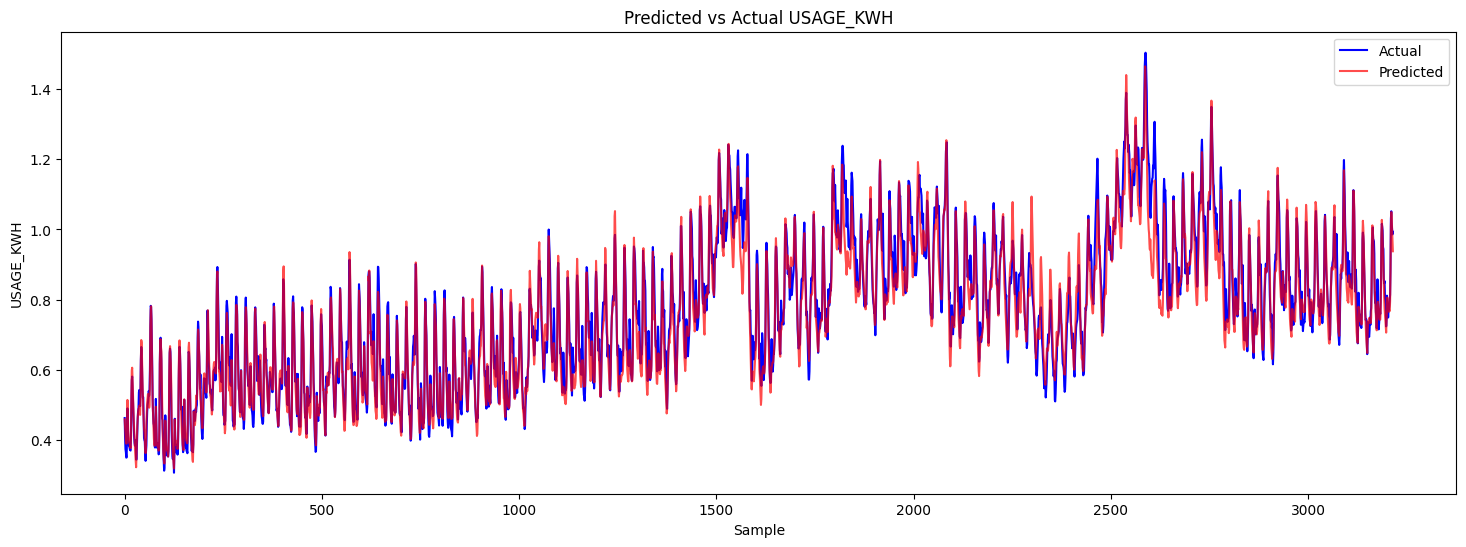

In [42]:
predictions = evaluate_model(
    trained_tft,
    val_loader
)